In [20]:
import re
import os
import glob
import zipfile
import requests
from urllib.request import urlretrieve
import json
import pandas as pd
import matplotlib
%load_ext rpy2.ipython

In [2]:
%cd /Users/merigo/Documents/MDS_2022/Git_Repositories/block_6/525_cloud_comp/milestone_1/data

/Users/merigo/Documents/MDS_2022/Git_Repositories/block_6/525_cloud_comp/milestone_1/data


In [3]:
# Necessary metadata
article_id = 14096681  # this is the unique identifier of the article on figshare (changed to rainfall data)
url = f"https://api.figshare.com/v2/articles/{14096681}"
headers = {"Content-Type": "application/json"}
output_directory = "figsharerainfall/"

In [4]:
response = requests.request("GET", url, headers=headers)
data = json.loads(response.text)  # this contains all the articles data, feel free to check it out
files = data["files"]             # this is just the data about the files, which is what we want
files

[{'id': 26579150,
  'name': 'daily_rainfall_2014.png',
  'size': 58863,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/files/26579150',
  'supplied_md5': 'fd32a2ffde300a31f8d63b1825d47e5e',
  'computed_md5': 'fd32a2ffde300a31f8d63b1825d47e5e'},
 {'id': 26579171,
  'name': 'environment.yml',
  'size': 192,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/files/26579171',
  'supplied_md5': '060b2020017eed93a1ee7dd8c65b2f34',
  'computed_md5': '060b2020017eed93a1ee7dd8c65b2f34'},
 {'id': 26586554,
  'name': 'README.md',
  'size': 5422,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/files/26586554',
  'supplied_md5': '61858c6cc0e6a6d6663a7e4c75bbd88c',
  'computed_md5': '61858c6cc0e6a6d6663a7e4c75bbd88c'},
 {'id': 26766812,
  'name': 'data.zip',
  'size': 814041183,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/files/26766812',
  'supplied_md5': 'b517383f76e77bd03755a63a8f

In [5]:
%%time
files_to_dl = ["data.zip"]  # feel free to add other files here
for file in files:
    if file["name"] in files_to_dl:
        os.makedirs(output_directory, exist_ok=True)
        urlretrieve(file["download_url"], output_directory + file["name"])

CPU times: user 2.84 s, sys: 3.71 s, total: 6.55 s
Wall time: 2min 25s


In [6]:
%%time
with zipfile.ZipFile(os.path.join(output_directory, "data.zip"), 'r') as f:
    f.extractall(output_directory)

CPU times: user 7.2 s, sys: 863 ms, total: 8.06 s
Wall time: 9.3 s


In [7]:
%ls -ltr figsharerainfall

total 12428672
drwxr-xr-x  30 merigo  staff        960 27 Mar 15:11 __MACOSX/
-rw-r--r--   1 merigo  staff  814041183 30 Mar 21:55 data.zip
-rw-r--r--   1 merigo  staff   95376895 30 Mar 21:55 MPI-ESM-1-2-HAM_daily_rainfall_NSW.csv
-rw-r--r--   1 merigo  staff   94960113 30 Mar 21:55 AWI-ESM-1-1-LR_daily_rainfall_NSW.csv
-rw-r--r--   1 merigo  staff   82474546 30 Mar 21:55 NorESM2-LM_daily_rainfall_NSW.csv
-rw-r--r--   1 merigo  staff  127613760 30 Mar 21:55 ACCESS-CM2_daily_rainfall_NSW.csv
-rw-r--r--   1 merigo  staff  232118894 30 Mar 21:55 FGOALS-f3-L_daily_rainfall_NSW.csv
-rw-r--r--   1 merigo  staff  330360682 30 Mar 21:55 CMCC-CM2-HR4_daily_rainfall_NSW.csv
-rw-r--r--   1 merigo  staff  254009247 30 Mar 21:55 MRI-ESM2-0_daily_rainfall_NSW.csv
-rw-r--r--   1 merigo  staff  235661418 30 Mar 21:55 GFDL-CM4_daily_rainfall_NSW.csv
-rw-r--r--   1 merigo  staff  294260911 30 Mar 21:55 BCC-CSM2-MR_daily_rainfall_NSW.csv
-rw-r--r--   1 merigo  staff  295768615 30 Mar 21:55 EC-Earth3-Veg

In [8]:
%%time
### just listing to get an idea how individual file looks like 
use_cols = ["time", "lat_min", "lat_max", "lon_min","lon_max","rain (mm/day)"]
df = pd.read_csv("figsharerainfall/CMCC-ESM2_daily_rainfall_NSW.csv", usecols=use_cols,dtype={'TailNum': 'str'})
df

CPU times: user 1.31 s, sys: 115 ms, total: 1.43 s
Wall time: 1.48 s


,time,lat_min,lat_max,lon_min,lon_max,rain (mm/day)
0,1889-01-01 12:00:00,-35.811518,-34.86911,140.625,141.875,1.581171e-09
1,1889-01-02 12:00:00,-35.811518,-34.86911,140.625,141.875,1.809992e-08
2,1889-01-03 12:00:00,-35.811518,-34.86911,140.625,141.875,1.032463e-10
3,1889-01-04 12:00:00,-35.811518,-34.86911,140.625,141.875,2.250775e-02
4,1889-01-05 12:00:00,-35.811518,-34.86911,140.625,141.875,8.606200e+00
...,...,...,...,...,...,...
3541225,2014-12-27 12:00:00,-30.157068,-29.21466,153.125,154.375,1.973634e-01
3541226,2014-12-28 12:00:00,-30.157068,-29.21466,153.125,154.375,3.416612e-01
3541227,2014-12-29 12:00:00,-30.157068,-29.21466,153.125,154.375,1.598722e+00
3541228,2014-12-30 12:00:00,-30.157068,-29.21466,153.125,154.375,1.301707e+00


In [9]:
%%time
## here we are using a normal python way for merging the data 
import pandas as pd
use_cols = ["rain (mm/day)"]
files = glob.glob('figsharerainfall/*.csv')
df = pd.concat((pd.read_csv(file, index_col=0, usecols=use_cols)
                .assign(model=re.findall("/([^_]*)", file)[0])
                for file in files)
              )
df.to_csv("combined/combined_data_2.csv")

CPU times: user 1min 29s, sys: 3.84 s, total: 1min 33s
Wall time: 1min 33s


In [10]:
df = df.reset_index()

In [11]:
df

,rain (mm/day),model
0,4.244226e-13,MPI-ESM-1-2-HAM
1,4.217326e-13,MPI-ESM-1-2-HAM
2,4.498125e-13,MPI-ESM-1-2-HAM
3,4.251282e-13,MPI-ESM-1-2-HAM
4,4.270161e-13,MPI-ESM-1-2-HAM
...,...,...
62513858,6.689683e+00,SAM0-UNICON
62513859,7.862555e+00,SAM0-UNICON
62513860,1.000503e+01,SAM0-UNICON
62513861,8.541592e+00,SAM0-UNICON


CPU times: user 16.5 s, sys: 1.76 s, total: 18.2 s
Wall time: 18.6 s


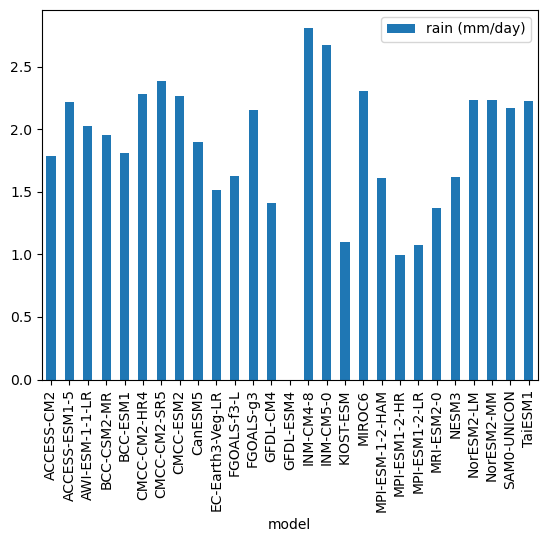

In [12]:
%%time
cols = ["rain (mm/day)", "model"]
filtered_df = pd.read_csv('combined/combined_data.csv', usecols = cols)
filtered_df["rain (mm/day)"] = filtered_df[["rain (mm/day)"]].astype("float32")
filtered_df.groupby("model").mean().plot(kind="bar");

In [13]:
%%sh
du -sh combined/combined_data.csv

5.6G	combined/combined_data.csv


In [14]:
print(df.shape)

(62513863, 2)


In [15]:
df.head()

,rain (mm/day),model
0,4.244226e-13,MPI-ESM-1-2-HAM
1,4.217326e-13,MPI-ESM-1-2-HAM
2,4.498125e-13,MPI-ESM-1-2-HAM
3,4.251282e-13,MPI-ESM-1-2-HAM
4,4.270161e-13,MPI-ESM-1-2-HAM


Test the data trasnsfer process using Arrow:

In [22]:
import pyarrow.dataset as ds
import pyarrow as pa
import pyarrow 
from pyarrow import csv
import rpy2_arrow.pyarrow_rarrow as pyra

In [25]:
%%time
dataset = ds.dataset("/Users/merigo/Documents/MDS_2022/Git_Repositories/block_6/525_cloud_comp/milestone_1/data/combined", format="csv")
# Converting the `pyarrow dataset` to a `pyarrow table`
table = dataset.to_table()
# Converting a `pyarrow table` to a `rarrow table`
r_table = pyra.converter.py2rpy(table)

CPU times: user 15 s, sys: 1.92 s, total: 16.9 s
Wall time: 11.9 s


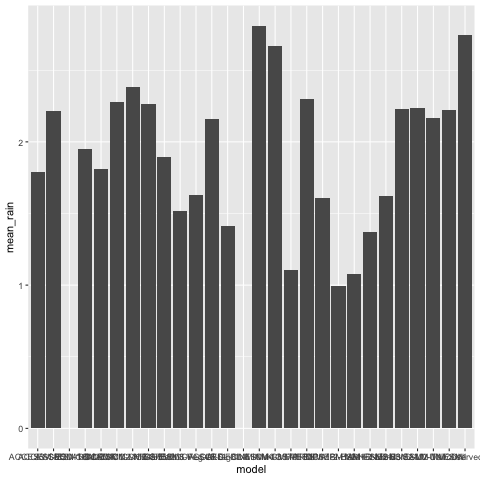

In [28]:
%%R -i r_table
suppressMessages(library(dplyr))
suppressMessages(library(ggplot2))
suppressMessages(library(arrow))

r_table %>% group_by(model) %>%
  summarize(mean_rain = mean(`rain (mm/day)`)) %>% 
    as.data.frame() %>% 
    ggplot(aes(x=model, y=mean_rain)) + geom_bar(stat="identity")

In [ ]:
%reset -f